In [1]:
#Imports and Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# Set seaborn style
sns.set(style='whitegrid', palette="husl")

# Load dataset
df = pd.read_csv(r'C:\Users\nirun\OneDrive\Desktop\2025-Y2-S1-MLB-B6G1-05-PGNO-105\data\raw\heart_disease_risk.csv')

#Basic info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

# Identify numerical columns that are likely categorical
suspected_categorical = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() <= 10:
        unique_vals = sorted(df[col].unique())
        print(f"\n{col}: {unique_vals} (likely categorical)")
        suspected_categorical.append(col)

print(f"\nSuspected categorical features: {suspected_categorical}")

Dataset shape: (70000, 19)

Data types:
Chest_Pain             float64
Shortness_of_Breath    float64
Fatigue                float64
Palpitations           float64
Dizziness              float64
Swelling               float64
Pain_Arms_Jaw_Back     float64
Cold_Sweats_Nausea     float64
High_BP                float64
High_Cholesterol       float64
Diabetes               float64
Smoking                float64
Obesity                float64
Sedentary_Lifestyle    float64
Family_History         float64
Chronic_Stress         float64
Gender                 float64
Age                    float64
Heart_Risk             float64
dtype: object

Chest_Pain: [0.0, 1.0] (likely categorical)

Shortness_of_Breath: [0.0, 1.0] (likely categorical)

Fatigue: [0.0, 1.0] (likely categorical)

Palpitations: [0.0, 1.0] (likely categorical)

Dizziness: [0.0, 1.0] (likely categorical)

Swelling: [0.0, 1.0] (likely categorical)

Pain_Arms_Jaw_Back: [0.0, 1.0] (likely categorical)

Cold_Sweats_Nausea: [0.0, 1.

In [2]:
# Copy dataframe for interpreted labels
df_interpreted = df.copy()


# Example mappings (only for binary and chest pain)
categorical_mappings = {
    'Gender': {0: 'Female', 1: 'Male'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'Diabetes': {0: 'No', 1: 'Yes'},
    'High_BP': {0: 'No', 1: 'Yes'},
    'High_Cholesterol': {0: 'No', 1: 'Yes'},
    'Obesity': {0: 'No', 1: 'Yes'},
    'Sedentary_Lifestyle': {0: 'No', 1: 'Yes'},
    'Family_History': {0: 'No', 1: 'Yes'},
    'Chronic_Stress': {0: 'No', 1: 'Yes'},
    'Chest_Pain': {0: 'Typical', 1: 'Atypical', 2: 'Non-anginal', 3: 'Asymptomatic'},
    'Heart_Risk': {0: 'Low', 1: 'High'}
}

# Apply reverse mapping to create interpretable categories
for col, mapping in categorical_mappings.items():
    if col in df.columns:
        df_interpreted[f'{col}_Label'] = df[col].map(mapping)
        print(f"Created {col}_Label from {col}")

Created Gender_Label from Gender
Created Smoking_Label from Smoking
Created Diabetes_Label from Diabetes
Created High_BP_Label from High_BP
Created High_Cholesterol_Label from High_Cholesterol
Created Obesity_Label from Obesity
Created Sedentary_Lifestyle_Label from Sedentary_Lifestyle
Created Family_History_Label from Family_History
Created Chronic_Stress_Label from Chronic_Stress
Created Chest_Pain_Label from Chest_Pain
Created Heart_Risk_Label from Heart_Risk


In [3]:
# Now demonstrate various encoding methods
print("=== ENCODING DEMONSTRATION ===")

# 1. Label Encoding (already applied for binary features)
binary_features = [c for c in suspected_categorical if df[c].nunique() == 2]
for col in binary_features:
    print(f"{col}: {df[col].unique()} (binary)")

# 2. One-Hot Encoding example for Chest_Pain (multi-class)
if 'Chest_Pain' in df.columns:
    chest_pain_onehot = pd.get_dummies(df_interpreted['Chest_Pain_Label'], prefix='Chest_Pain', drop_first=True)
    print("\nOne-Hot Encoding Demo for Chest_Pain:")
    print(chest_pain_onehot.head())

# 3. Ordinal Encoding – Not applicable (no ordinal categorical in our dataset)
print("\nOrdinal Encoding Example: (Not applicable in this dataset)")


=== ENCODING DEMONSTRATION ===
Chest_Pain: [0. 1.] (binary)
Shortness_of_Breath: [0. 1.] (binary)
Fatigue: [0. 1.] (binary)
Palpitations: [1. 0.] (binary)
Dizziness: [0. 1.] (binary)
Swelling: [0. 1.] (binary)
Pain_Arms_Jaw_Back: [0. 1.] (binary)
Cold_Sweats_Nausea: [0. 1.] (binary)
High_BP: [0. 1.] (binary)
High_Cholesterol: [0. 1.] (binary)
Diabetes: [0. 1.] (binary)
Smoking: [1. 0.] (binary)
Obesity: [0. 1.] (binary)
Sedentary_Lifestyle: [1. 0.] (binary)
Family_History: [0. 1.] (binary)
Chronic_Stress: [0. 1.] (binary)
Gender: [0. 1.] (binary)
Heart_Risk: [0. 1.] (binary)

One-Hot Encoding Demo for Chest_Pain:
   Chest_Pain_Typical
0                True
1                True
2               False
3               False
4                True

Ordinal Encoding Example: (Not applicable in this dataset)


In [4]:
#Encoding Comparison
print("\n=== ENCODING COMPARISON ===")

# Original categorical subset
original_categorical = df[suspected_categorical]

# One-hot encode all interpreted categorical labels
label_cols = [col+'_Label' for col in categorical_mappings.keys() if col+'_Label' in df_interpreted.columns]
df_onehot = pd.get_dummies(df_interpreted[label_cols], drop_first=True)

print(f"Original shape: {original_categorical.shape}")
print(f"One-hot shape: {df_onehot.shape}")
print(f"Memory usage - Original: {original_categorical.memory_usage(deep=True).sum()} bytes")
print(f"Memory usage - One-hot: {df_onehot.memory_usage(deep=True).sum()} bytes")



=== ENCODING COMPARISON ===
Original shape: (70000, 18)
One-hot shape: (70000, 11)
Memory usage - Original: 10080132 bytes
Memory usage - One-hot: 770132 bytes


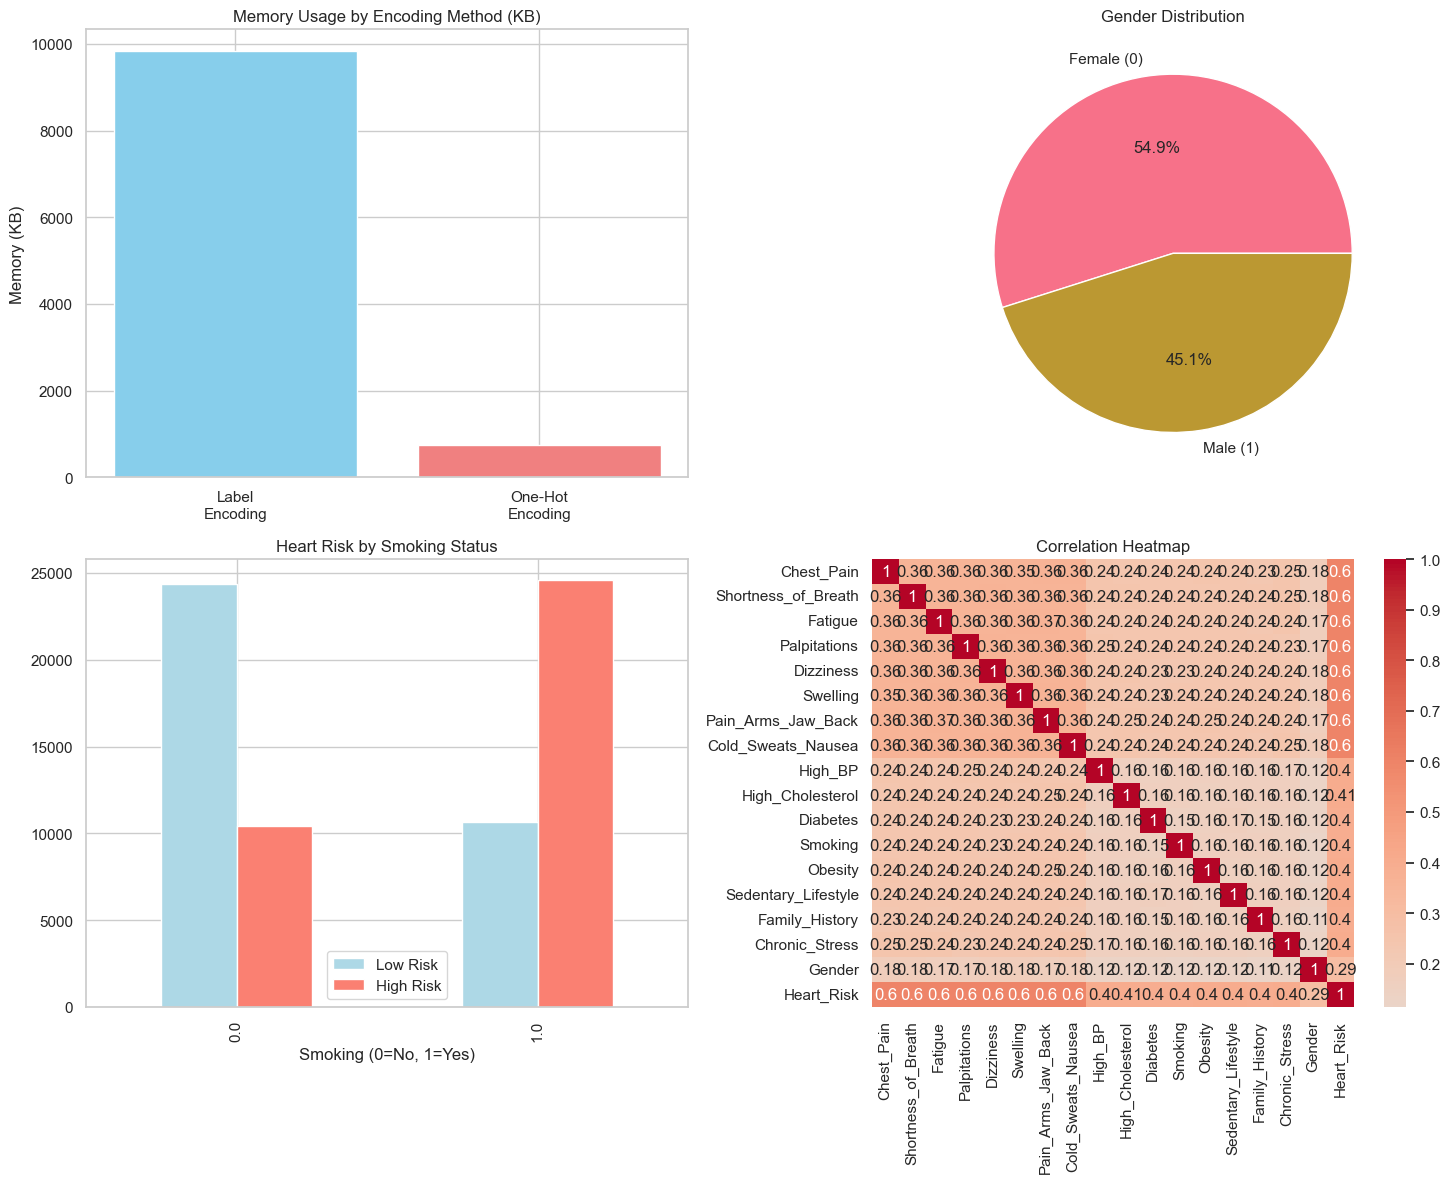

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Memory Usage by Encoding
methods = ['Label\nEncoding', 'One-Hot\nEncoding']
memory_usage = [
    original_categorical.memory_usage(deep=True).sum()/1024,
    df_onehot.memory_usage(deep=True).sum()/1024
]
axes[0,0].bar(methods, memory_usage, color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Memory Usage by Encoding Method (KB)')
axes[0,0].set_ylabel('Memory (KB)')

# 2. Gender Distribution
if 'Gender' in df.columns:
    gender_dist = df['Gender'].value_counts()
    axes[0,1].pie(gender_dist.values, labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%')
    axes[0,1].set_title('Gender Distribution')

# 3. Heart Risk by Smoking
if 'Smoking' in df.columns and 'Heart_Risk' in df.columns:
    smoking_risk = pd.crosstab(df['Smoking'], df['Heart_Risk'])
    smoking_risk.plot(kind='bar', ax=axes[1,0], color=['lightblue','salmon'])
    axes[1,0].set_title('Heart Risk by Smoking Status')
    axes[1,0].set_xlabel('Smoking (0=No, 1=Yes)')
    axes[1,0].legend(['Low Risk','High Risk'])

# 4. Correlation Heatmap
if len(suspected_categorical) >= 3 and 'Heart_Risk' in df.columns:
    corr_matrix = df[suspected_categorical].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.savefig('../results/eda_visualizations/categorical_encoding_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



In [6]:
# CREATE AND SAVE PROCESSED CSV FILE
# =================================================================

print("\n" + "="*50)
print("CREATING PROCESSED DATASET")
print("="*50)

# Step 1: Create the final processed dataset
df_final = df.copy()  # Start with original data

# Step 2: Add all the interpretable labels created
for col, mapping in categorical_mappings.items():
    if col in df.columns:
        df_final[f'{col}_Label'] = df[col].map(mapping)
        print(f"✓ Added {col}_Label column")

# Step 3: Add one-hot encoded columns for multi-category features
if 'Chest_Pain' in df.columns:
    # Create one-hot encoding for Chest_Pain
    chest_pain_onehot = pd.get_dummies(df_interpreted['Chest_Pain_Label'], 
                                     prefix='ChestPain', drop_first=True)
    
    # Add one-hot columns to final dataset
    df_final = pd.concat([df_final, chest_pain_onehot], axis=1)
    print(f"✓ Added {chest_pain_onehot.shape[1]} one-hot encoded columns for Chest_Pain")

# Step 4: Add any other enhanced features (optional)
# Example: Create risk score composite feature
risk_factors = ['Smoking', 'Diabetes', 'High_BP', 'High_Cholesterol', 'Obesity']
available_risk_factors = [col for col in risk_factors if col in df.columns]

if len(available_risk_factors) >= 2:
    df_final['Composite_Risk_Score'] = df_final[available_risk_factors].sum(axis=1)
    print(f"✓ Added Composite_Risk_Score from {len(available_risk_factors)} risk factors")

# Step 5: Show the transformation summary
print(f"\nDATASET TRANSFORMATION SUMMARY:")
print(f"Original dataset shape: {df.shape}")
print(f"Enhanced dataset shape: {df_final.shape}")
print(f"Columns added: {df_final.shape[1] - df.shape[1]}")
print(f"New columns: {list(set(df_final.columns) - set(df.columns))}")

# Step 6: Save the processed dataset
output_path = r'C:\Users\nirun\OneDrive\Desktop\2025-Y2-S1-MLB-B6G1-05-PGNO-105\results\outputs\IT24101256_processed.csv'

# Create the directory if it doesn't exist
import os
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the enhanced dataset
df_final.to_csv(output_path, index=False)
print(f"\n✅ PROCESSED DATASET SAVED TO:")
print(f"   {output_path}")

# Step 7: Verification - Show sample of what was saved
print(f"\nSAMPLE OF PROCESSED DATA (first 3 rows):")
print("="*80)
print(df_final.head(3).to_string())

# Step 8: Show file size comparison
original_size = os.path.getsize(r'C:\Users\nirun\OneDrive\Desktop\2025-Y2-S1-MLB-B6G1-05-PGNO-105\data\raw\heart_disease_risk.csv')
processed_size = os.path.getsize(output_path)

print(f"\nFILE SIZE COMPARISON:")
print(f"Original file: {original_size/1024:.1f} KB")
print(f"Processed file: {processed_size/1024:.1f} KB") 
print(f"Size increase: {((processed_size/original_size - 1) * 100):.1f}%")

print(f"\n🎉 IT24101256 CATEGORICAL ENCODING ANALYSIS COMPLETE!")
print(f"📁 Files created:")
print(f"   • Processed dataset: IT24101256_processed.csv")
print(f"   • Visualization: categorical_encoding_analysis.png")
print(f"   • Ready for viva presentation! 🚀")

# Optional: Quick validation
print(f"\nQUICK VALIDATION:")
print(f"✓ All categorical features processed: {len([col for col in categorical_mappings.keys() if col in df.columns])}")
print(f"✓ Interpretable labels created: {len([col for col in df_final.columns if '_Label' in col])}")
print(f"✓ One-hot encoding demonstrated: {'ChestPain' in ' '.join(df_final.columns)}")
print(f"✓ Enhanced features added: {df_final.shape[1] - df.shape[1]} new columns")


CREATING PROCESSED DATASET
✓ Added Gender_Label column
✓ Added Smoking_Label column
✓ Added Diabetes_Label column
✓ Added High_BP_Label column
✓ Added High_Cholesterol_Label column
✓ Added Obesity_Label column
✓ Added Sedentary_Lifestyle_Label column
✓ Added Family_History_Label column
✓ Added Chronic_Stress_Label column
✓ Added Chest_Pain_Label column
✓ Added Heart_Risk_Label column
✓ Added 1 one-hot encoded columns for Chest_Pain
✓ Added Composite_Risk_Score from 5 risk factors

DATASET TRANSFORMATION SUMMARY:
Original dataset shape: (70000, 19)
Enhanced dataset shape: (70000, 32)
Columns added: 13
New columns: ['High_BP_Label', 'Chronic_Stress_Label', 'Diabetes_Label', 'Obesity_Label', 'Family_History_Label', 'Sedentary_Lifestyle_Label', 'Heart_Risk_Label', 'Chest_Pain_Label', 'Composite_Risk_Score', 'High_Cholesterol_Label', 'Smoking_Label', 'ChestPain_Typical', 'Gender_Label']

✅ PROCESSED DATASET SAVED TO:
   C:\Users\nirun\OneDrive\Desktop\2025-Y2-S1-MLB-B6G1-05-PGNO-105\result